In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

artists = pd.read_csv('./data/artists.csv')
artworks = pd.read_csv('./data/artworks.csv')

## ARTISTS

### Age

In [77]:
# substract Birth Year from Death year to get artists Age at the time of death
artists['Age'] = artists['Death Year'] - artists['Birth Year']

Artists who lived for more than a century, with the exception of the first row which represents a company rather than an individual.

In [40]:
artists[artists['Age'] >= 100].sort_values(by="Age", ascending=False).head(5)

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year,Age
12486,38294,"Union Paper Bag Machine Company, Philadelphia, PA",NaN,NaN,1869.0,1999.0,130.0
9164,23931,B. Efimov,Russian,Male,1900.0,2008.0,108.0
3449,3844,Leni Matthaei,German,Female,1873.0,1981.0,108.0
13568,43532,Manoel de Oliveira,Portuguese,NaN,1908.0,2015.0,107.0
9306,24431,Horacio Coppola,Argentine,Male,1906.0,2012.0,106.0


Average and Median age of artists in the collection at the time of their death.


In [69]:
average_age = artists['Age'].mean()
median_age = artists["Age"].median()
print("Average age:", average_age)
print("Median age:", median_age)

Average age: 72.32501095050372
Median age: 75.0


### Nationality


Five most common nationalities among the artists featured in MoMa's collection.

In [79]:
top_nationalities = artists['Nationality'].value_counts().head(5)
top_nationalities


Nationality
American    5198
German       930
French       839
British      835
Italian      531
Name: count, dtype: int64

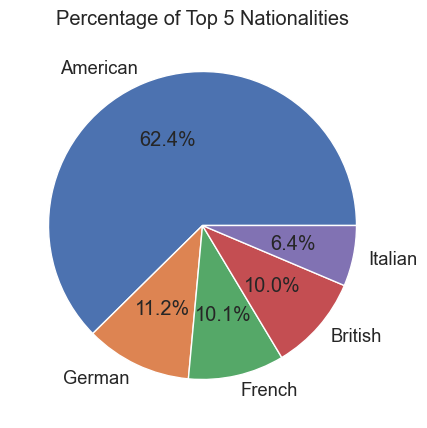

In [84]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(top_nationalities, labels=top_nationalities.index.tolist(), autopct='%1.1f%%') 
plt.title('Percentage of Top 5 Nationalities') 

plt.show() 


### Gender

Number of male and female artists.

In [90]:
artists['Gender'] = artists['Gender'].str.lower()
artist_gender = artists['Gender'].value_counts()
artist_gender

Gender
male      9826
female    2193
Name: count, dtype: int64

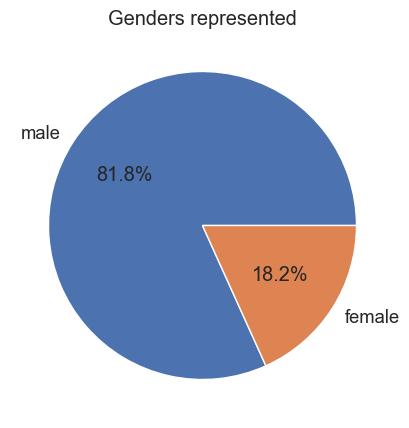

In [111]:
# pie plot
plt.figure(figsize=(7, 5))  
plt.pie(artist_gender, labels=artist_gender.index.tolist(), autopct='%1.1f%%') 
plt.title("Genders represented") 

plt.show() 

At what age artists died

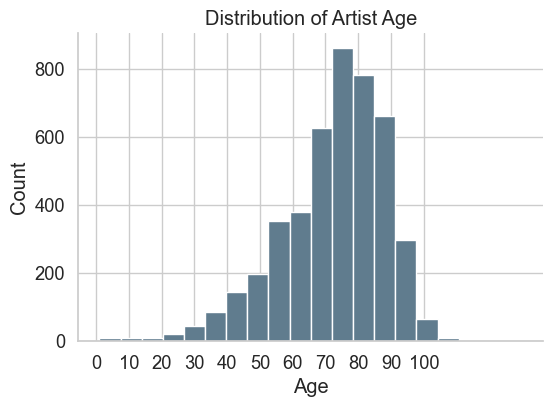

In [112]:
# Filter out rows where "Age" is NaN
artists_age = artists.dropna(subset=['Age'])

# histogram plot
sns.set(style='whitegrid', font_scale=1.2)  
plt.figure(figsize=(6, 4))  
plt.hist(artists_age['Age'], bins=20, color='#607c8e', edgecolor='white') 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('Distribution of Artist Age')  
plt.xticks(range(0, 101, 10))  
sns.despine()  

plt.show()  # Show the plot


## ARTWORKS

Top 10 art mediums represented in MoMa's collection

In [107]:
artworks['Classification'].value_counts().head(10)

Classification
Print                        30807
Photograph                   29909
Illustrated Book             26160
Drawing                      11735
Design                       11223
Mies van der Rohe Archive     3331
Architecture                  2947
Video                         2363
Film                          2292
Painting                      2270
Name: count, dtype: int64

## ARTISTS & ARTWORKS

Top 10 artists with greatest number of artworks on display at MoMA

In [99]:
artists_and_artworks = pd.concat([artists,artworks],join='inner',keys='Artist ID')
top_artists = artists_and_artworks['Name'].value_counts()[:10]
top_artists

Name
Eugène Atget                5051
Louise Bourgeois            3319
Ludwig Mies van der Rohe    2567
Unknown photographer        1576
Jean Dubuffet               1436
Lee Friedlander             1318
Pablo Picasso               1311
Marc Chagall                1163
Henri Matisse               1064
Pierre Bonnard               895
Name: count, dtype: int64

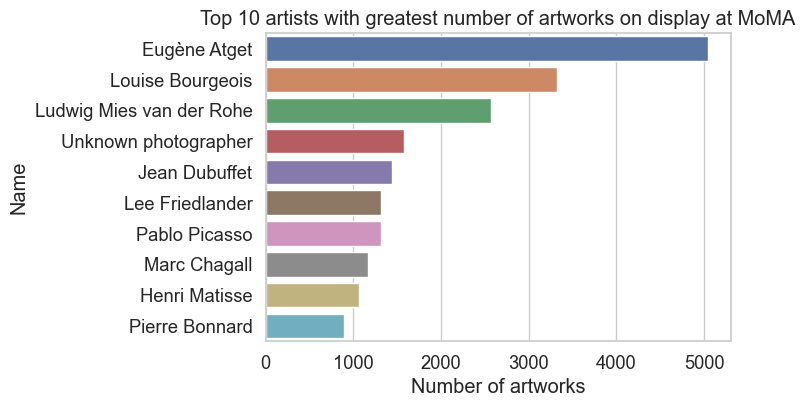

In [104]:
# bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.xlabel('Number of artworks')
plt.xticks(rotation=0)
plt.title('Top 10 artists with greatest number of artworks on display at MoMA')
plt.show()